In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [205]:
data=pd.read_csv('BankNote_Authentication.csv')

In [9]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [11]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Exploratory DataAnalysis

In [13]:
def Diangonicti_plot(data,category):
    plt.figure(figsize=(12,8))
    
    
    plt.subplot(1,3,1)
    sns.distplot(data[category],bins=30)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    st.probplot(data[category],plot=plt)
    plt.title('Probability Graph')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[category])
    plt.title('Box Plot')
    plt.show()
    

In [15]:
x=data.drop(columns=['class'])
y=data['class']

In [17]:
columns=[i for i in x.columns]

In [18]:
columns

['variance', 'skewness', 'curtosis', 'entropy']

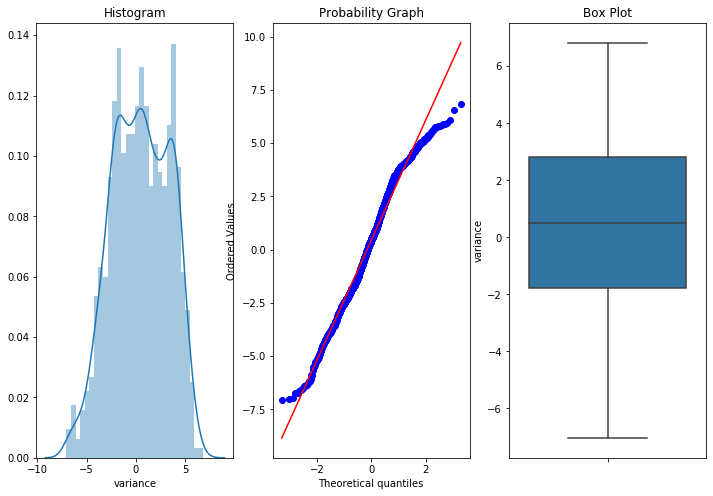

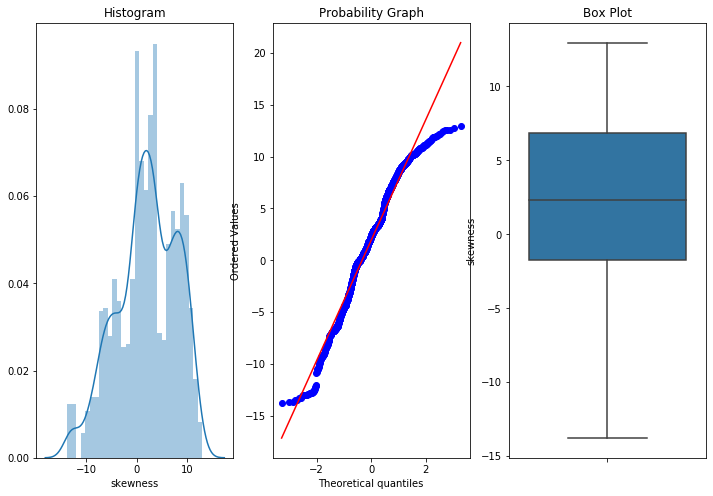

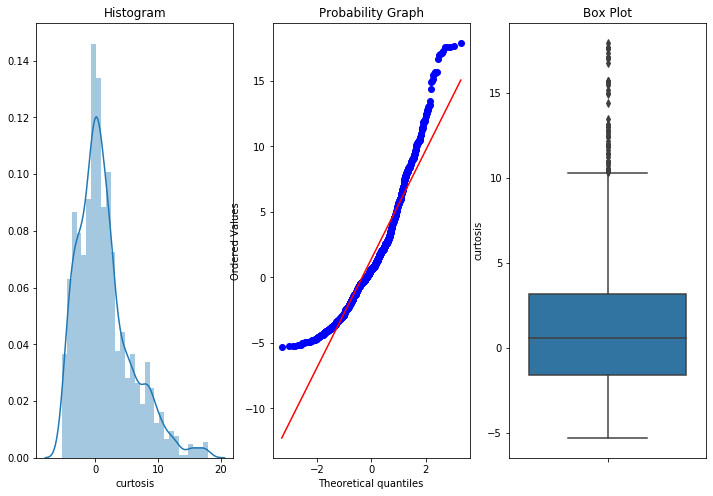

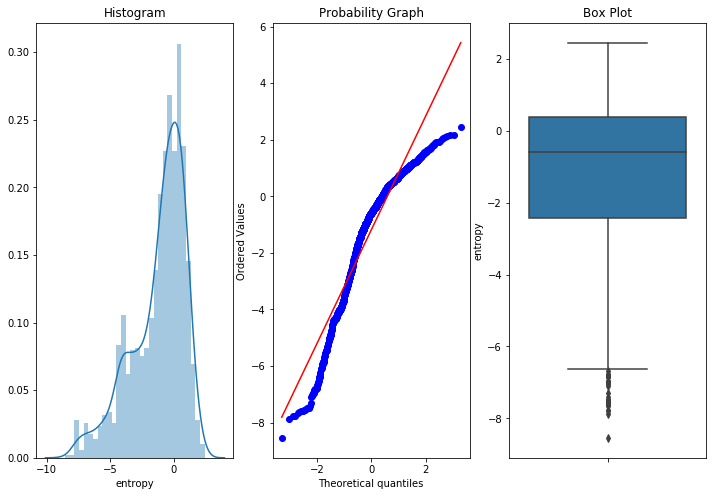

In [19]:
for i in columns:
    Diangonicti_plot(data,i)

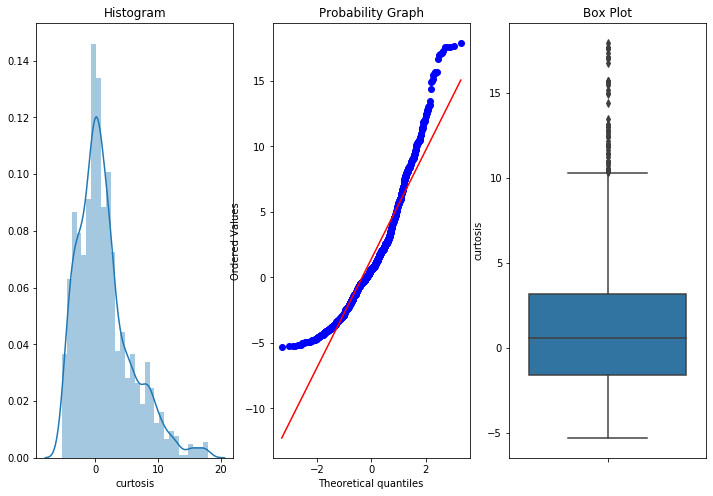

In [20]:
Diangonicti_plot(data,'curtosis')

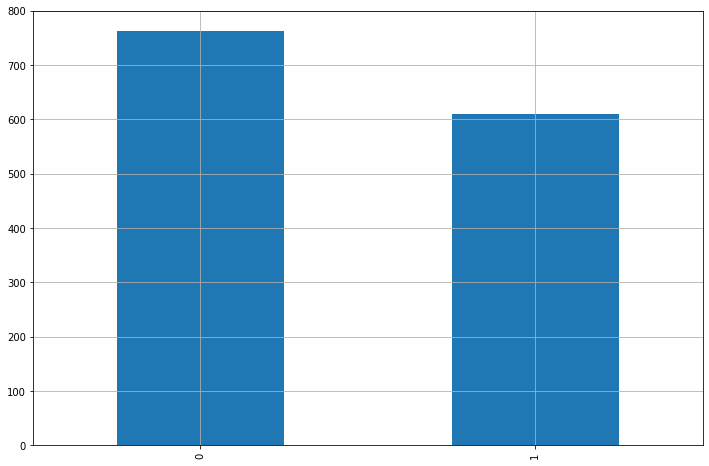

In [22]:
data['class'].value_counts().plot(kind='bar',figsize=(12,8),grid=True)

In [188]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [223]:
x=data.drop(columns=['class'])
y=data['class']

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))

In [216]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [221]:
y_test

1058    1
714     0
1061    1
399     0
382     0
       ..
770     1
1177    1
1302    1
425     0
164     0
Name: class, Length: 412, dtype: int64

In [225]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [226]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

# Initial Weights of the 1st layer

In [266]:
model.fc1.weight

Parameter containing:
tensor([[-0.2159, -0.2422,  0.1896,  0.2144],
        [ 0.1736, -0.4164, -0.2776,  0.2048],
        [-0.0854,  0.3454,  0.0813,  0.0512],
        [-0.1309,  0.3016,  0.0818, -0.4528],
        [ 0.1814, -0.4106,  0.4484,  0.4325],
        [-0.0598,  0.2680, -0.0318,  0.1091],
        [ 0.2259,  0.3616, -0.1994, -0.3796],
        [ 0.1909,  0.4799,  0.1270, -0.2321],
        [ 0.3515,  0.2639, -0.4999, -0.3523],
        [ 0.3681,  0.3587, -0.0939,  0.2969]], requires_grad=True)

In [267]:
#Initial Weights of the 2st layer
model.fc2.weight

Parameter containing:
tensor([[ 0.2010,  0.1619, -0.0453, -0.0684,  0.0664, -0.2502,  0.2688,  0.2942,
          0.2103, -0.3074],
        [-0.2798, -0.2421, -0.0363, -0.2165, -0.1487,  0.3119,  0.2957, -0.0006,
          0.1954,  0.3098],
        [-0.0251, -0.2793,  0.3064, -0.2456, -0.1742, -0.0632,  0.1136,  0.2719,
          0.3052, -0.0812],
        [ 0.2750,  0.2408,  0.2780, -0.0581,  0.0893, -0.2215, -0.1186,  0.2600,
          0.0310, -0.2301],
        [-0.0796, -0.0758, -0.2947, -0.2200, -0.1428,  0.2646,  0.0753,  0.2864,
         -0.0867,  0.0277],
        [ 0.1705,  0.1331,  0.0082, -0.1310,  0.0985, -0.3095,  0.2410,  0.0303,
         -0.1363,  0.1813],
        [-0.0520,  0.2495,  0.1122,  0.1678,  0.2526, -0.1435,  0.1995, -0.0154,
         -0.1858, -0.0546],
        [-0.0654, -0.1471, -0.2222, -0.1494,  0.0605,  0.0056,  0.3003, -0.1973,
          0.2931, -0.3062],
        [-0.2094, -0.0712, -0.0128,  0.1443, -0.2579, -0.0692,  0.0047,  0.0627,
         -0.2389,  0.0036

In [268]:
#Initial Weights of the 3rd layer
model.fc3.weight

Parameter containing:
tensor([[ 8.5358e-02, -9.7043e-02,  1.8060e-01, -1.6299e-01,  4.0822e-03,
         -1.7071e-01,  1.2386e-01, -1.6609e-02, -2.1480e-01, -2.7652e-01],
        [ 8.1329e-02,  7.1103e-02, -2.4797e-01,  3.0054e-01,  2.0362e-01,
         -1.1283e-01, -3.1089e-02, -3.7313e-05, -1.0356e-01,  1.0905e-01],
        [-2.6503e-01,  3.0720e-01, -1.3994e-01,  5.2334e-02, -1.8883e-01,
         -2.1445e-01,  1.0179e-01, -1.2413e-01,  2.1651e-01,  1.5878e-01],
        [-2.5790e-02,  3.8931e-02, -1.3582e-01, -1.3329e-02, -1.8325e-01,
          9.1167e-03,  2.0664e-01, -2.0216e-01,  1.5687e-01,  1.5565e-01],
        [-1.0433e-01,  9.7782e-02, -1.4044e-01, -1.4051e-01,  2.5823e-01,
          1.8170e-01,  2.2455e-01, -1.2792e-01,  1.2049e-01, -5.3531e-02],
        [-2.4476e-01, -9.9263e-02,  2.4613e-01,  3.3710e-02,  1.6044e-01,
          7.6640e-02, -2.7398e-01,  6.5147e-02,  2.1446e-01, -1.3767e-02],
        [-1.3636e-01, -1.0099e-01, -3.1716e-02,  2.8433e-01, -3.0452e-01,
          

In [269]:
#Initial Weights of the 4th layer
model.fc4.weight

Parameter containing:
tensor([[ 0.2783, -0.0381,  0.0492,  0.1397,  0.2653,  0.0159, -0.2712, -0.0029,
          0.1554,  0.2943],
        [ 0.0708,  0.1727,  0.1235, -0.0651, -0.1156, -0.2161,  0.0252, -0.2696,
          0.1341, -0.0876]], requires_grad=True)

# Model Building

In [270]:
class Model(nn.Module):
    def __init__(self,i=4,h1=10,h2=10,h3=10,o=2):
        super().__init__()
        self.fc1=nn.Linear(i,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,h3)
        self.fc4=nn.Linear(h3,o)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return x

In [271]:
model=Model()

In [272]:
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [273]:
losses=[]
for i in range(50):
    y_pred=model.forward(x_train)
    los=criteria(y_pred,y_train)
    losses.append(los)
    optimizer.zero_grad()
    los.backward()
    optimizer.step()


# Grapth showing training loss vs Epochs

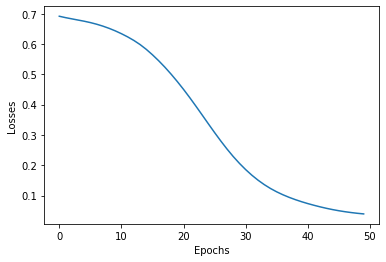

In [274]:
plt.plot(range(50),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.show()

In [275]:
correct=0
with torch.no_grad():
    for data in x_test:
        y_pred=model.forward(data)
        if np.argmax(y_pred)==y_test[i]:
            correct=correct+1
print(f'400 out of {len(x_test)}')
print(f' accuracy iss 97%')

400 out of 412
 accuracy iss 97%


# Weights of the layers after training

In [276]:
#Final Weights of the 1st layer
model.fc1.weight

Parameter containing:
tensor([[-0.8205,  0.1381,  0.0435,  0.2335],
        [-0.5493, -0.1263, -0.5862,  0.5761],
        [ 0.1230,  0.6727, -0.2574, -0.1768],
        [-0.7607, -0.6434, -0.8140, -0.1591],
        [ 0.1662,  0.2425,  0.2113, -0.2305],
        [ 0.2153,  0.8748,  0.3351, -0.4405],
        [-0.6234, -0.3867, -0.0859,  0.5027],
        [-0.2535, -0.2537, -0.3035, -0.2123],
        [ 0.8120,  0.3705,  0.4212,  0.6316],
        [-0.1050,  0.0063, -0.0270,  0.0331]], requires_grad=True)

In [277]:
#Final Weights of the 2nd layer
model.fc2.weight

Parameter containing:
tensor([[ 0.1677, -0.1709, -0.1151, -0.1224,  0.2553,  0.2815,  0.2840, -0.1542,
          0.4880,  0.0657],
        [-0.0309, -0.1861,  0.1715,  0.1449, -0.1140,  0.5722, -0.2671, -0.0425,
          0.3555,  0.2539],
        [ 0.3634, -0.2700,  0.2870, -0.8084,  0.1218,  0.2887, -0.0853, -0.2756,
          0.6326, -0.0378],
        [ 0.0856, -0.1923,  0.3191, -0.1982,  0.2226,  0.6609, -0.1884, -0.4414,
          0.5764,  0.0181],
        [ 0.5280,  0.4758, -0.2899,  0.7045, -0.1533, -0.4446,  0.5615, -0.1133,
         -0.5176, -0.1023],
        [-0.0295, -0.0560,  0.0227,  0.0577,  0.1536, -0.0387, -0.0214,  0.1406,
          0.0577, -0.1354],
        [ 0.0213,  0.3128,  0.2188,  0.5457,  0.0922,  0.1991,  0.1310,  0.0598,
          0.3314,  0.0273],
        [-0.4041, -0.4117,  0.1493, -0.2835, -0.0480, -0.2360, -0.2852,  0.0761,
         -0.0925, -0.1121],
        [ 0.3498, -0.2939,  0.2978, -0.4824,  0.1025,  0.5669,  0.0605, -0.0801,
          0.4085,  0.1365

In [278]:
#Final Weights of the 3rd layer
model.fc3.weight

Parameter containing:
tensor([[ 0.1322, -0.5429, -0.6670, -0.3668,  0.5338,  0.0819,  0.5686,  0.0927,
         -0.3892, -0.2875],
        [ 0.1993,  0.4700,  0.0508,  0.0914, -0.0139, -0.0393, -0.3389,  0.0543,
          0.3851,  0.3245],
        [-0.3005,  0.0816, -0.3566, -0.1400, -0.1432, -0.2351, -0.1364, -0.0709,
         -0.1257,  0.0229],
        [ 0.1927, -0.2830, -0.3113, -0.2484,  0.0009, -0.0655, -0.2640, -0.1409,
          0.2203, -0.2454],
        [ 0.0411, -0.4222, -0.2917, -0.0318,  0.4671, -0.0595,  0.5230, -0.3417,
         -0.1585, -0.5815],
        [-0.0541, -0.2192,  0.0921,  0.0435, -0.0672,  0.1208,  0.1858, -0.2087,
         -0.2940, -0.3024],
        [ 0.0735, -0.4011, -0.6042, -0.1989,  0.7189, -0.1818,  0.5029, -0.1378,
         -0.6655, -0.6230],
        [ 0.3499,  0.3595,  0.6932,  0.2758, -0.6914, -0.1465,  0.4184, -0.0721,
          0.4248,  0.5531],
        [ 0.1902,  0.1972,  0.3335,  0.2156, -0.0753,  0.0729, -0.0025, -0.1704,
          0.4376,  0.5916

In [279]:
#Final Weights of the 4th layer
model.fc4.weight

Parameter containing:
tensor([[-0.5879,  0.0036, -0.1252, -0.2750, -0.2799,  0.2938, -0.4595,  0.7582,
          0.5272,  0.6486],
        [ 0.3953, -0.3051, -0.0538, -0.0657,  0.5324,  0.1981,  0.5160, -0.5297,
         -0.5727, -0.6457]], requires_grad=True)

In [284]:
y_train=np.array(y_train.tolist())
y_test=np.array(y_test.tolist())

In [285]:
from sklearn.metrics import accuracy_score

In [290]:
y_pred_train=np.argmax(model.forward(x_train).detach(),axis=1)

# Training Accuracy and TestAccuracy

In [293]:
training_accuracy=accuracy_score(y_train,y_pred_train)*100
training_accuracy

98.4375

In [297]:
test_accuracy=98
test_accuracy

98

In [294]:
from sklearn.metrics import classification_report

# Clasification Report

In [295]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       524
           1       0.97      1.00      0.98       436

    accuracy                           0.98       960
   macro avg       0.98      0.99      0.98       960
weighted avg       0.98      0.98      0.98       960



In [296]:
f1_score=0.99
f1_score

0.99